### Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load CSV into dataframes

In [11]:
df_1 = pd.read_csv("C:/Users/Mohsen/Desktop/train.csv")

In [12]:
df_1.head(5)

,Id,LotArea,Street,LotShape,Utilities,LotConfig,BldgType,HouseStyle,OverallCond,YearBuilt,...,Exterior1st,Foundation,CentralAir,FullBath,BedroomAbvGr,Fireplaces,GarageType,Fence,YrSold,SalePrice
0,1,8450,Pave,Reg,AllPub,Inside,1Fam,2Story,5,2003,...,VinylSd,PConc,Y,2,3,0,Attchd,NaN,2008,208500
1,2,9600,Pave,Reg,AllPub,FR2,1Fam,1Story,8,1976,...,MetalSd,CBlock,Y,2,3,1,Attchd,NaN,2007,181500
2,3,11250,Pave,IR1,AllPub,Inside,1Fam,2Story,5,2001,...,VinylSd,PConc,Y,2,3,1,Attchd,NaN,2008,223500
3,4,9550,Pave,IR1,AllPub,Corner,1Fam,2Story,5,1915,...,Wd Sdng,BrkTil,Y,1,3,1,Detchd,NaN,2006,140000
4,5,14260,Pave,IR1,AllPub,FR2,1Fam,2Story,5,2000,...,VinylSd,PConc,Y,2,4,1,Attchd,NaN,2008,250000


### Classify features

In [4]:
categorical_features = []
numerical_features = []

In [5]:
def classify_features():
    categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
    #Categorical features that are encoded with numerical values
    categorical_features = categorical_features + ['MSSubClass', 'OverallQual', 'OverallCond']
    numerical_features = [feature for feature in df.columns if feature not in categorical_features and feature != 'Id']
    return categorical_features, numerical_features

In [6]:
categorical_features, numerical_features = classify_features()

In [7]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond']

In [8]:
numerical_features

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Handle Null values

In [9]:
def get_null_percent(df):
    return {feature: (df[feature].isnull().sum()/len(df))*100 
                for feature in df.columns if df[feature].isnull().sum() > 0}

In [10]:
null_features = get_null_percent(df)

In [11]:
null_features

{'LotFrontage': 17.73972602739726,
 'Alley': 93.76712328767123,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'Electrical': 0.0684931506849315,
 'FireplaceQu': 47.26027397260274,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'PoolQC': 99.52054794520548,
 'Fence': 80.75342465753424,
 'MiscFeature': 96.30136986301369}

#### Remove features with large percent of null values.

In [12]:
del_features = [key for key, val in null_features.items() if val > 75]

In [13]:
del_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
df.drop(del_features, axis = 1, inplace = True)

In [15]:
categorical_features, numerical_features = classify_features()

In [16]:
null_features = get_null_percent(df)

#### Handle Null values in numerical features

In [17]:
for feature in numerical_features:
    feature_median = df[feature].median()
    df[feature].fillna(value = feature_median, inplace=True)

#### Handle Null values in categorical features

In [18]:
for feature in categorical_features:
    feature_mode = df[feature].mode()[0]
    df[feature].fillna(value = feature_mode, inplace=True)

In [19]:
null_features = get_null_percent(df)

In [20]:
null_features

{}

### Handling Outliers in the data

In [21]:
len(numerical_features)

34

##### Boxplots for outlier detection

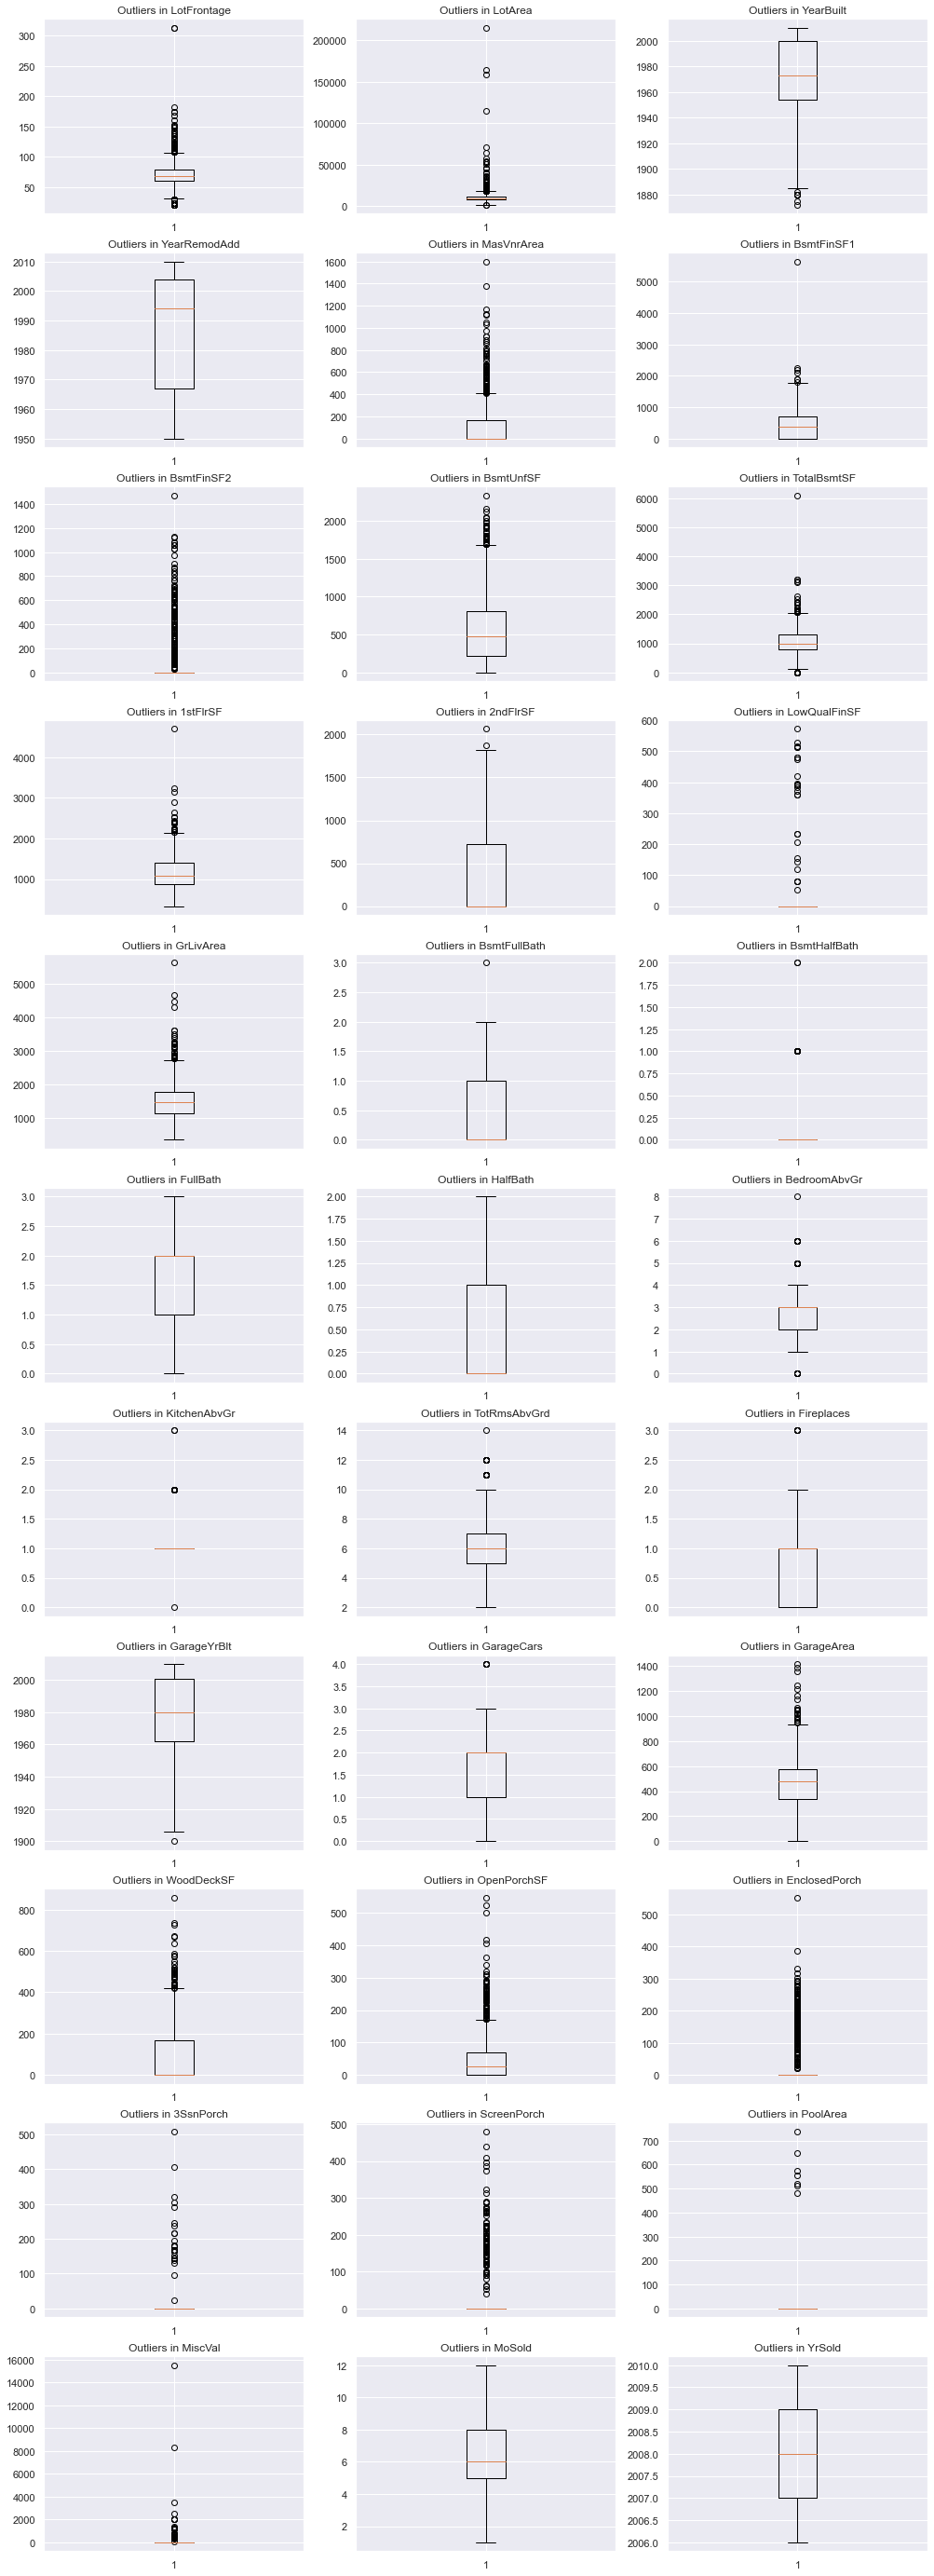

In [22]:
fig, axs = plt.subplots(11, 3)
# fig.suptitle('Outliers in the data')
fig.set_figheight(50)
fig.set_figwidth(17)
feature_idx = 0
for row_idx in range(0, 11):
    for col_idx in range(0, 3):
        feature = numerical_features[feature_idx]
        axs[row_idx, col_idx].boxplot(df[feature])
        axs[row_idx, col_idx].set_title('Outliers in {}'.format(feature))
        feature_idx += 1
plt.show()

In [23]:
len(numerical_features)

34

##### Histogram for understanding distribution

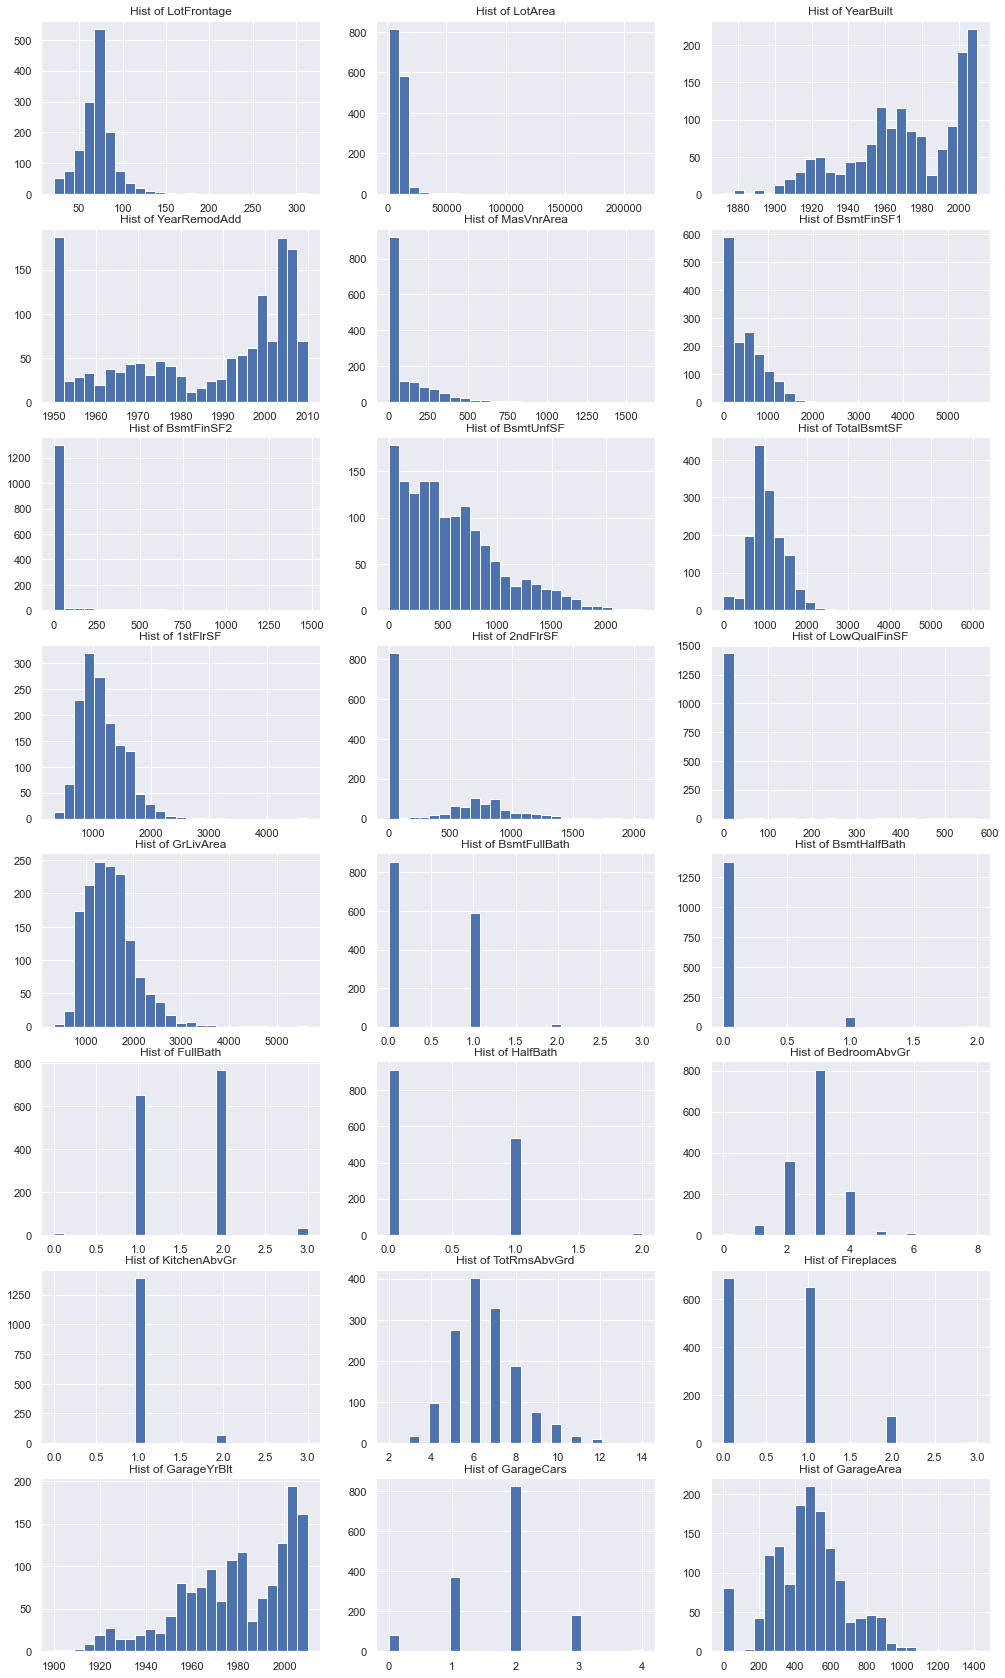

In [24]:
fig, axs = plt.subplots(8, 3)
# fig.suptitle('Outliers in the data')
fig.set_figheight(30)
fig.set_figwidth(17)
feature_idx = 0
for row_idx in range(0, 8):
    for col_idx in range(0, 3):
        feature = numerical_features[feature_idx]
        axs[row_idx, col_idx].hist(df[feature], bins=25)
        axs[row_idx, col_idx].set_title('Hist of {}'.format(feature))
        feature_idx += 1
plt.show()

##### Skewness and Kurtosis

In [25]:
a = pd.DataFrame(df.skew(), columns=['Skewness'])
b = pd.DataFrame(df.kurt(), columns=['Kurtosis'])
tdf = a.join(b)

In [26]:
tdf.head(70)

,Skewness,Kurtosis
Id,0.000000,-1.200000
MSSubClass,1.407657,1.580188
LotFrontage,2.409147,21.912954
LotArea,12.207688,203.243271
OverallQual,0.216944,0.096293
OverallCond,0.693067,1.106413
YearBuilt,-0.613461,-0.439552
YearRemodAdd,-0.503562,-1.272245
MasVnrArea,2.677616,10.141416
BsmtFinSF1,1.685503,11.118236


In [27]:
def get_iqr_limit(df, feature):
    Q1 =df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    return (Q1 - (IQR*1.5)), (Q3 + (IQR*1.5))

In [28]:
f_lst = []
for feature in numerical_features:
    lower_limit, upper_limit = get_iqr_limit(df, feature)
    if lower_limit == 0 and upper_limit == 0:
        # remove features with mostly zero values
        df.drop(columns=feature, axis = 1, inplace=True)
        f_lst.append(feature)
    else:
        # indexes of the outliers
        outlier_idxs = np.where(np.logical_or(df[feature].values < lower_limit, 
                                              df[feature].values > upper_limit))[0]
        feature_median = df[feature].median()
        df.loc[list(outlier_idxs), feature] = feature_median
categorical_features, numerical_features = classify_features()

In [29]:
df.shape

(1460, 69)

In [30]:
a = pd.DataFrame(df.skew(), columns=['Skewness'])
b = pd.DataFrame(df.kurt(), columns=['Kurtosis'])
tdf = a.join(b)

In [31]:
tdf.head(70)

,Skewness,Kurtosis
Id,0.000000,-1.200000
MSSubClass,1.407657,1.580188
LotFrontage,0.055849,0.537558
LotArea,-0.086122,0.226082
OverallQual,0.216944,0.096293
OverallCond,0.693067,1.106413
YearBuilt,-0.553889,-0.631531
YearRemodAdd,-0.503562,-1.272245
MasVnrArea,1.547163,1.164300
BsmtFinSF1,0.688888,-0.432670


In [ ]:
df.to_csv('df_clean.csv', index=False)

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

In [ ]:
df = pd.read_csv("C:/Users/Mohsen/Desktop/df_clean.csv")

In [19]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000
5,6,50,RL,85,14115.0,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,40,30,10,2009,WD,Normal,143000
6,7,20,RL,75,10084.0,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,255,57,8,2007,WD,Normal,307000
7,8,60,RL,69,10382.0,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,235,25,11,2009,WD,Normal,200000
8,9,50,RM,51,6120.0,Pave,Reg,Lvl,AllPub,Inside,...,Fa,TA,Y,90,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420.0,Pave,Reg,Lvl,AllPub,Corner,...,Gd,TA,Y,0,4,1,2008,WD,Normal,118000


In [20]:
# Question1
a = max(df.LotArea)
print('house the maximum is ', a)
b = min(df.LotArea)
print('house the minimum is ', b)


house the maximum is  17671.0
house the minimum is  1491.0


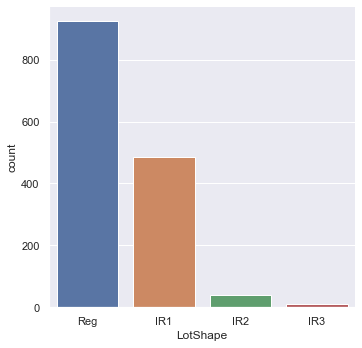

In [28]:
# Question2
df.groupby(['LotShape']).size()
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="LotShape", kind="count", data=df)


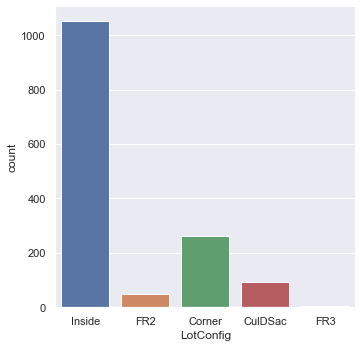

In [29]:
# Question3,How many houses are contained  Lots configuration on the corner, it is 263
df.groupby(['LotConfig']).size()
sns.catplot(x="LotConfig", kind="count", data=df)

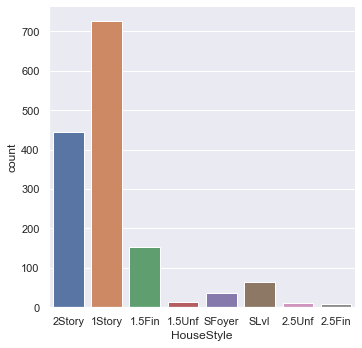

In [30]:
# Question 4,it is 445
df.groupby(['HouseStyle']).size()
sns.catplot(x="HouseStyle", kind="count", data=df)

In [14]:
#Question 5, most of the people prefer 1Story(726) than 2Story(445)

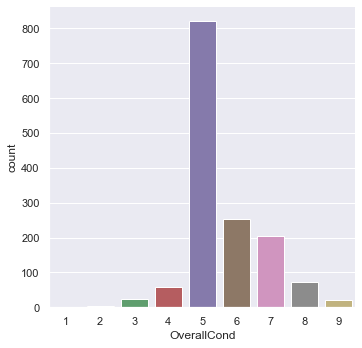

In [31]:
# Question6, Total number of houses with best overall condition according to the reviews from 8 or more than 8 on the scale of 10 is 94
df.groupby(['OverallCond']).size()
sns.catplot(x="OverallCond", kind="count", data=df)

In [34]:
# Question 7,the oldest built house and latest newly built house in this particular area
d = max(df.YearBuilt)
print('The latest built house is',d)
e = min(df.YearBuilt)
print('The oldest built house is',e)


The latest built house is 2010
The oldest built house is 1885


The popular roofstyle  is Shed


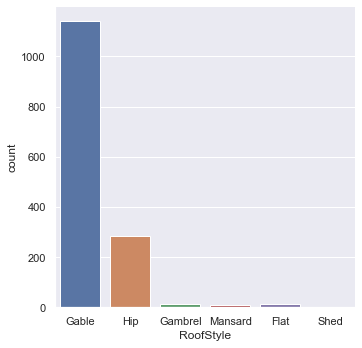

In [35]:
# Question 8,Which roof style is more popular in that area
f = max(df.RoofStyle)
print('The popular roofstyle  is',f)
sns.catplot(x="RoofStyle", kind="count", data=df)

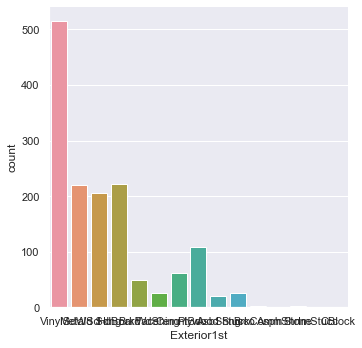

In [36]:
# Question 9,Number of buildings which used MetalSd material as their first exteriors material, it is 220
df.groupby(['Exterior1st']).size()
sns.catplot(x="Exterior1st", kind="count", data=df)

The foundation of most of the houses  is Wood


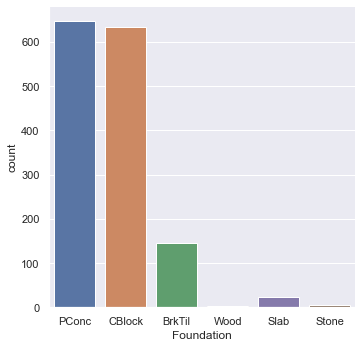

In [37]:
# Question 10,Which technique is used to made the foundation of most of the houses
g = max(df.Foundation)
print('The foundation of most of the houses  is',g)
sns.catplot(x="Foundation", kind="count", data=df)

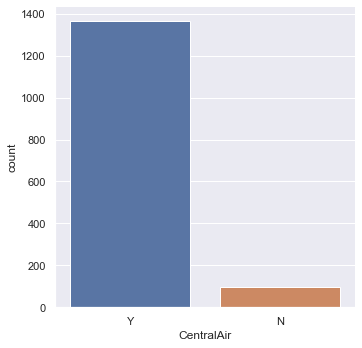

In [38]:
# Question 11, What is the percentage of central air adopted houses is 0.93493150684
df.groupby(['CentralAir']).size()
sns.catplot(x="CentralAir", kind="count", data=df)

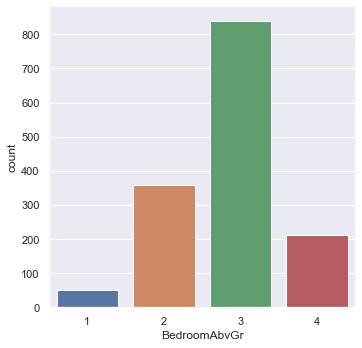

In [39]:
#Question 12,Most of the people preferred to live in 3 bhk house(804) than 2 bhk house(358)  in this area according to this dataset
df.groupby(['BedroomAbvGr']).size()
sns.catplot(x="BedroomAbvGr", kind="count", data=df)

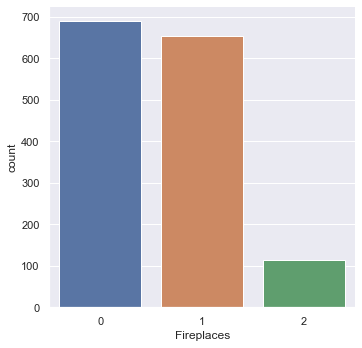

In [40]:
#Question13,Number of houses without fireplace is 690
df.groupby(['Fireplaces']).size()
sns.catplot(x="Fireplaces", kind="count", data=df)

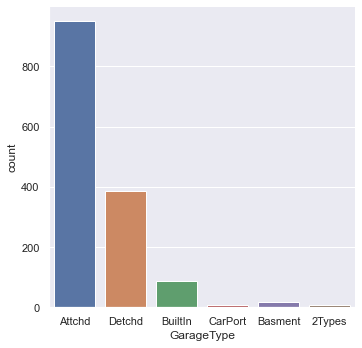

In [41]:
# Question 14,  88 of houses is there in which car garage are built in the house
df.groupby(['GarageType']).size()
sns.catplot(x="GarageType", kind="count", data=df)

In [26]:
# Question 15, The percentage of houses without fencing is 1179
df_1['Fence'].isna().sum()


1179

In [27]:
# Question 16,Find the most expensive house in the area is 755000
h = max(df.SalePrice)
print('the most expensive house is ', h)

the most expensive house is  340000


The year most number of houses were sold is  2010


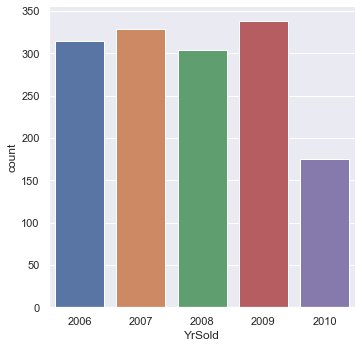

In [42]:
# Question 17, In which year most number of houses were sold
I = max(df.YrSold)
print('The year most number of houses were sold is ', I)
sns.catplot(x="YrSold", kind="count", data=df)

In [29]:
# Question 18, Is there any relation between Yearbuilt and salePrice,
#it shows that there is a relation between yearbuilt and price,new home are more expensive
f_oneway(df.YearBuilt, df.SalePrice)

F_onewayResult(statistic=12245.369304811149, pvalue=0.0)